In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-transactions/sample_dataset.csv


In [2]:
cust_data=pd.read_csv("/kaggle/input/customer-transactions/sample_dataset.csv")

In [3]:
cust_data.head(5)

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


In [4]:
# Extract the month and create a new column 'month'
cust_data['month'] = pd.to_datetime(cust_data['Date']).dt.strftime('%m')
# Split the "date" column by "-"
cust_data[['Birthyear', 'month', 'day']] = cust_data['Birthdate'].str.split('-', expand=True)

# Create a new column "year" and store the first part (year)
cust_data['Birthyear'] = cust_data['Birthyear']

cust_data.drop('day', axis=1, inplace=True)
cust_data.drop('month', axis=1, inplace=True)
cust_data.head(5)

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Birthyear
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,2002
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,1985
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,1981
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,1977
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,1951


In [5]:
# Calculate the mode of the 'Category' column
mode_category = cust_data['Gender'].mode()[0]

# Fill missing values with the mode
cust_data['Gender'].fillna(mode_category, inplace=True)

In [6]:
cust_data.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Birthyear
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,2002
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,1985
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,1981
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,1977
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,1951


In [7]:
# Extract the month and create a new column 'month'
cust_data['month'] = pd.to_datetime(cust_data['Date']).dt.strftime('%m')
# Split the "date" column by "-"
cust_data[['PurchaseMonth','Month','Day']] = cust_data['Date'].str.split('-', expand=True)

# Create a new column "year" and store the first part (year)
cust_data['PurchaseMonth'] = cust_data['PurchaseMonth']
cust_data.head(11)

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Birthyear,month,PurchaseMonth,Month,Day
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,2002,04,2023,04,03
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,1985,07,2023,07,17
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,1981,09,2023,09,20
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,1977,01,2023,01,11
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,1951,06,2023,06,13
5,576539,Monica,Bartlett,F,2001-10-20,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,2001,08,2023,08,24
6,124681,Thomas,Shaw,F,1976-10-26,145.94,2023-08-30,"Evans, Griffin and Torres",Cosmetic,1976,08,2023,08,30
7,521807,Kelsey,Pena,F,1968-10-28,161.39,2023-02-08,Miller PLC,Cosmetic,1968,02,2023,02,08
8,504238,Denise,Porter,M,1957-10-31,77.73,2023-01-12,Jackson-Morgan,Restaurant,1957,01,2023,01,12
9,583532,Alexander,Richardson,F,1974-10-27,142.85,2023-06-07,"Blake, Mays and Anderson",Clothing,1974,06,2023,06,07


In [8]:
from sklearn.preprocessing import LabelEncoder

# F=0, M=1
label_encoder = LabelEncoder()
cust_data['Encoded_Gender'] = label_encoder.fit_transform(cust_data['Gender'])

#Category >>> TCategory
label_encoder= LabelEncoder()
cust_data['Encoded_Category'] = label_encoder.fit_transform(cust_data['Category'])
cust_data.head(11)

#Cosmestic=1, Travel=5, Clothing=0, Electronics=2, =4

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Birthyear,month,PurchaseMonth,Month,Day,Encoded_Gender,Encoded_Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,2002,04,2023,04,03,0,1
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,1985,07,2023,07,17,0,5
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,1981,09,2023,09,20,1,0
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,1977,01,2023,01,11,1,1
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,1951,06,2023,06,13,0,2
5,576539,Monica,Bartlett,F,2001-10-20,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,2001,08,2023,08,24,0,1
6,124681,Thomas,Shaw,F,1976-10-26,145.94,2023-08-30,"Evans, Griffin and Torres",Cosmetic,1976,08,2023,08,30,0,1
7,521807,Kelsey,Pena,F,1968-10-28,161.39,2023-02-08,Miller PLC,Cosmetic,1968,02,2023,02,08,0,1
8,504238,Denise,Porter,M,1957-10-31,77.73,2023-01-12,Jackson-Morgan,Restaurant,1957,01,2023,01,12,1,4
9,583532,Alexander,Richardson,F,1974-10-27,142.85,2023-06-07,"Blake, Mays and Anderson",Clothing,1974,06,2023,06,07,0,0


In [9]:
# Convert 'Birthyear' column to integers
cust_data['Birthyear'] = pd.to_numeric(cust_data['Birthyear'], errors='coerce')

# Define a function to map birth years to generations
def map_to_generation(birth_year):
    if 1928 <= birth_year <= 1945:
        return 'Silent'
    elif 1946 <= birth_year <= 1964:
        return 'Baby Boomer'
    elif 1965 <= birth_year <= 1980:
        return 'Generation X'
    elif 1981 <= birth_year <= 1996:
        return 'Millennial'
    elif 1997 <= birth_year <= 2012:
        return 'Generation Z'
    else:
        return 'Unknown'

# Add a new column 'Generation' to the DataFrame
cust_data['Generation'] = cust_data['Birthyear'].apply(map_to_generation)

# Display the modified DataFrame
print(cust_data)

       Customer ID       Name    Surname Gender   Birthdate  \
0           752858       Sean  Rodriguez      F  2002-10-20   
1            26381   Michelle     Phelps      F  1985-10-24   
2           305449      Jacob   Williams      M  1981-10-25   
3           988259     Nathan     Snyder      M  1977-10-26   
4           764762    Crystal      Knapp      F  1951-11-02   
...            ...        ...        ...    ...         ...   
49995       891845  Christine      Leach      F  1997-10-21   
49996       800560       Anna      Allen      F  1999-10-21   
49997       133285     Nicole   Franklin      M  1979-10-26   
49998       616122      Maria     Keller      M  1981-10-25   
49999       832184      Billy     Walker      F  1958-10-31   

       Transaction Amount        Date                 Merchant Name  \
0                   35.47  2023-04-03                 Smith-Russell   
1                 2552.72  2023-07-17        Peck, Spence and Young   
2                  115.97  202

In [10]:
cust_data['Month'] = pd.to_numeric(cust_data['Month'], errors='coerce')

# Define a function to map months to seasons
def map_to_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Add a new column 'Season' to the DataFrame
cust_data['Season'] = cust_data['Month'].apply(map_to_season)

# Display the modified DataFrame
print(cust_data)

       Customer ID       Name    Surname Gender   Birthdate  \
0           752858       Sean  Rodriguez      F  2002-10-20   
1            26381   Michelle     Phelps      F  1985-10-24   
2           305449      Jacob   Williams      M  1981-10-25   
3           988259     Nathan     Snyder      M  1977-10-26   
4           764762    Crystal      Knapp      F  1951-11-02   
...            ...        ...        ...    ...         ...   
49995       891845  Christine      Leach      F  1997-10-21   
49996       800560       Anna      Allen      F  1999-10-21   
49997       133285     Nicole   Franklin      M  1979-10-26   
49998       616122      Maria     Keller      M  1981-10-25   
49999       832184      Billy     Walker      F  1958-10-31   

       Transaction Amount        Date                 Merchant Name  \
0                   35.47  2023-04-03                 Smith-Russell   
1                 2552.72  2023-07-17        Peck, Spence and Young   
2                  115.97  202

In [11]:
import datetime as dt

# Convert 'Birthyear' column to numeric values
cust_data['Birthyear'] = pd.to_numeric(cust_data['Birthyear'], errors='coerce')

# Calculate age based on the current year
current_year = dt.datetime.now().year
cust_data['Age'] = current_year - cust_data['Birthyear']

# Display the modified DataFrame
print(cust_data)

       Customer ID       Name    Surname Gender   Birthdate  \
0           752858       Sean  Rodriguez      F  2002-10-20   
1            26381   Michelle     Phelps      F  1985-10-24   
2           305449      Jacob   Williams      M  1981-10-25   
3           988259     Nathan     Snyder      M  1977-10-26   
4           764762    Crystal      Knapp      F  1951-11-02   
...            ...        ...        ...    ...         ...   
49995       891845  Christine      Leach      F  1997-10-21   
49996       800560       Anna      Allen      F  1999-10-21   
49997       133285     Nicole   Franklin      M  1979-10-26   
49998       616122      Maria     Keller      M  1981-10-25   
49999       832184      Billy     Walker      F  1958-10-31   

       Transaction Amount        Date                 Merchant Name  \
0                   35.47  2023-04-03                 Smith-Russell   
1                 2552.72  2023-07-17        Peck, Spence and Young   
2                  115.97  202

In [12]:
X=cust_data[['Encoded_Gender','Transaction Amount','Encoded_Category','Month','Age']]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

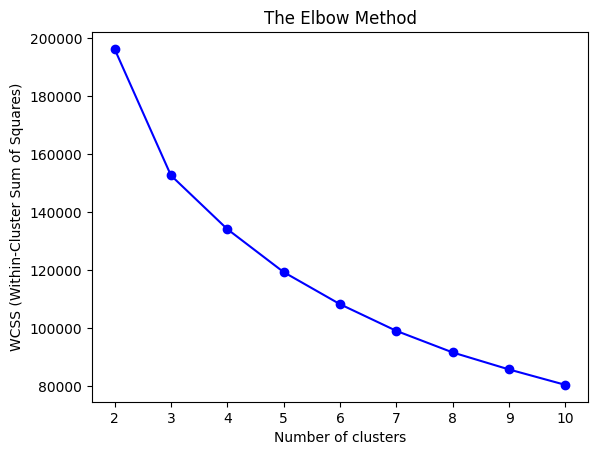

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming X is your feature matrix

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

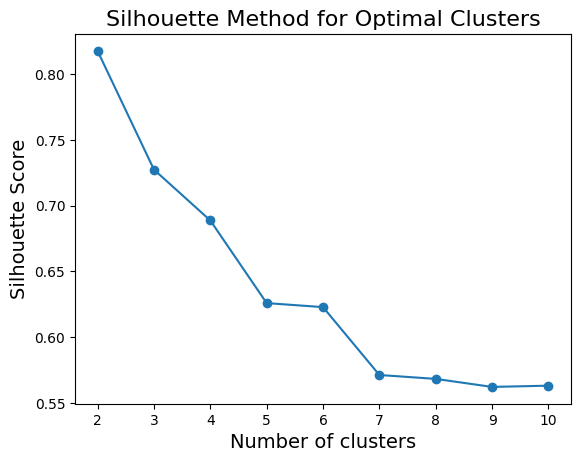

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is your data
silhouette_scores = [silhouette_score(X, KMeans(n_clusters=i, random_state=42).fit_predict(X)) for i in range(2, 11)]

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Method for Optimal Clusters', fontsize=16)
plt.show()

In [15]:
import numpy as np

# Assuming silhouette_scores is your list of silhouette scores
silhouette_scores = [0.5, 0.7, 0.9, 0.8, 0.6]  # Replace with your actual data

number_of_clusters = np.argmax(silhouette_scores) + 2

print("Number of Clusters Required is:", number_of_clusters)


Number of Clusters Required is: 4


In [16]:
#Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# We need to reduce dimensionality before we can visualise
from sklearn.decomposition import PCA

pca=PCA(n_components=4)
X_reduced=pca.fit_transform(X)
pca.explained_variance_ratio_

array([9.99265792e-01, 7.09461779e-04, 1.86576658e-05, 5.46971800e-06])

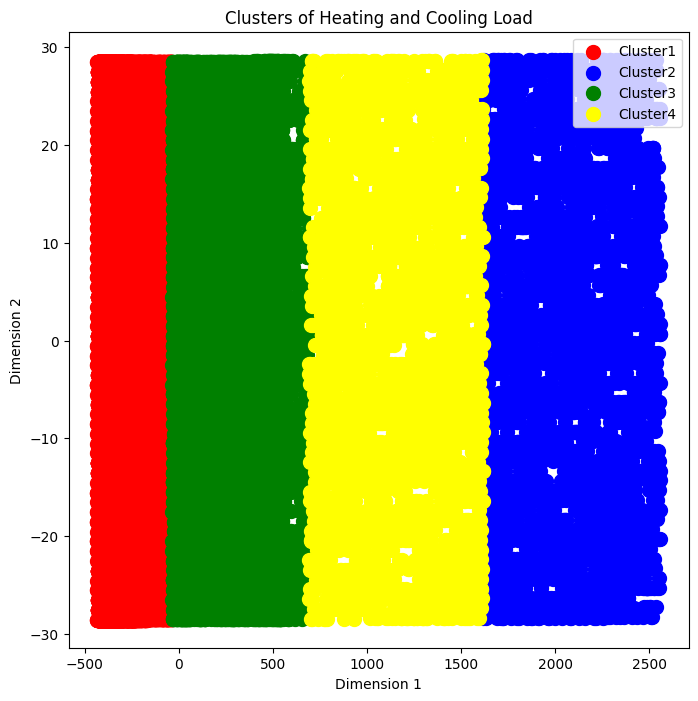

In [18]:
#Visualising the clusters

colours=['red','blue','green','yellow']

plt.figure(figsize=(8,8))
for i in range(4):
  plt.scatter(X_reduced[y_kmeans==i,0],X_reduced[y_kmeans==i,1],s=100,c=colours[i],label='Cluster'+str(i+1))
plt.title('Clusters of Heating and Cooling Load')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [19]:
#Build a model with kmenas

#Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

# Appending those cluster value into main dataframe (without standard-scalar)

cust_data['Clusters'] = y_kmeans + 1

cust_data.head(10)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Birthyear,month,PurchaseMonth,Month,Day,Encoded_Gender,Encoded_Category,Generation,Season,Age,Clusters
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,2002,04,2023,4,03,0,1,Generation Z,Spring,21,1
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,1985,07,2023,7,17,0,5,Millennial,Summer,38,2
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,1981,09,2023,9,20,1,0,Millennial,Fall,42,1
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,1977,01,2023,1,11,1,1,Generation X,Winter,46,1
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,1951,06,2023,6,13,0,2,Baby Boomer,Summer,72,1
5,576539,Monica,Bartlett,F,2001-10-20,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,2001,08,2023,8,24,0,1,Generation Z,Summer,22,1
6,124681,Thomas,Shaw,F,1976-10-26,145.94,2023-08-30,"Evans, Griffin and Torres",Cosmetic,1976,08,2023,8,30,0,1,Generation X,Summer,47,1
7,521807,Kelsey,Pena,F,1968-10-28,161.39,2023-02-08,Miller PLC,Cosmetic,1968,02,2023,2,08,0,1,Generation X,Winter,55,1
8,504238,Denise,Porter,M,1957-10-31,77.73,2023-01-12,Jackson-Morgan,Restaurant,1957,01,2023,1,12,1,4,Baby Boomer,Winter,66,1
9,583532,Alexander,Richardson,F,1974-10-27,142.85,2023-06-07,"Blake, Mays and Anderson",Clothing,1974,06,2023,6,07,0,0,Generation X,Summer,49,1


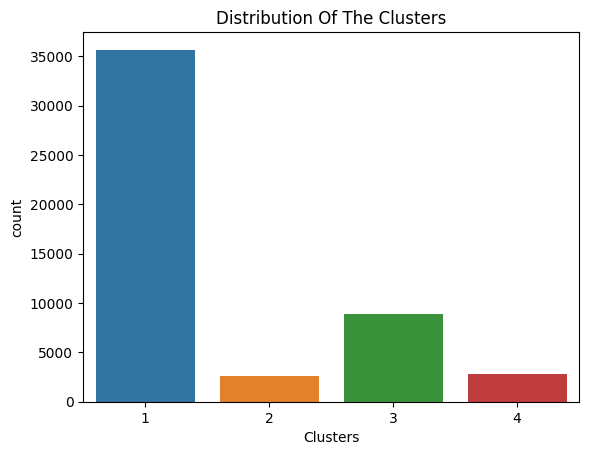

In [20]:
import seaborn as sns
pl = sns.countplot(x=cust_data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


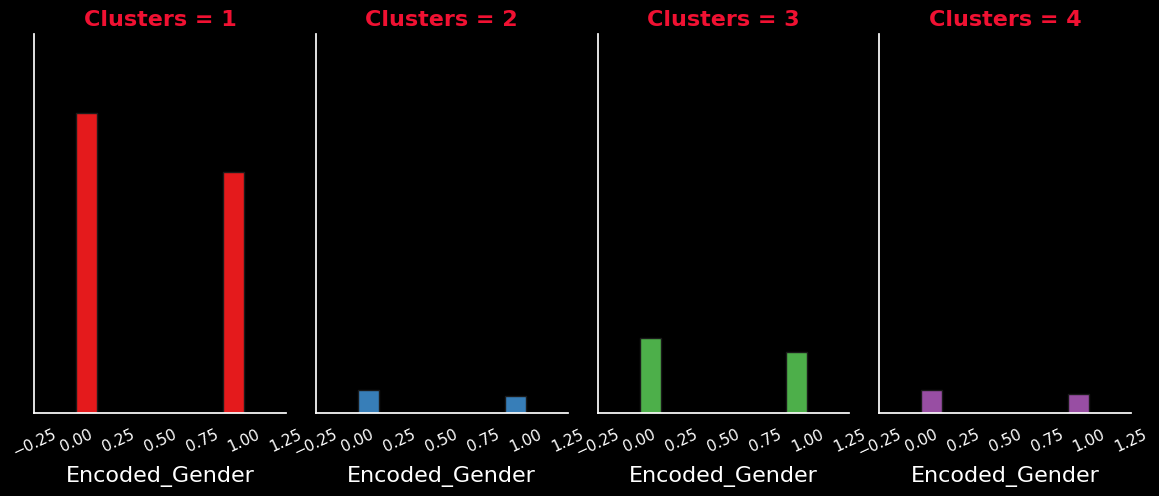

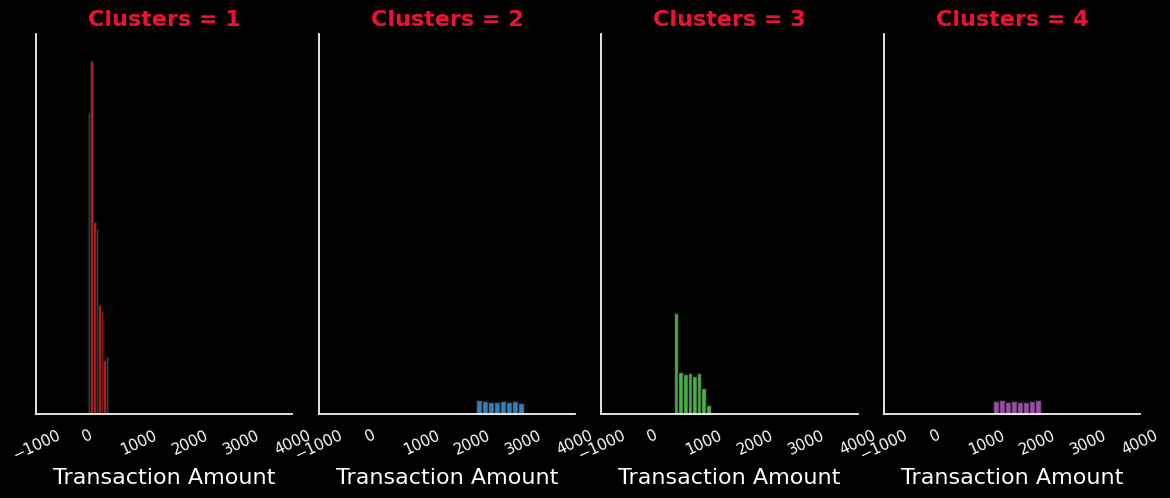

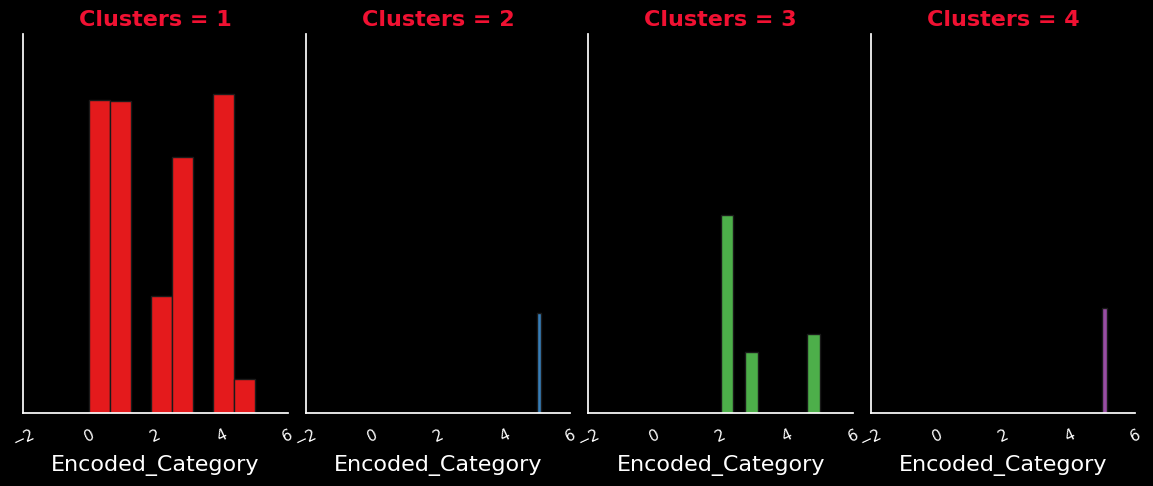

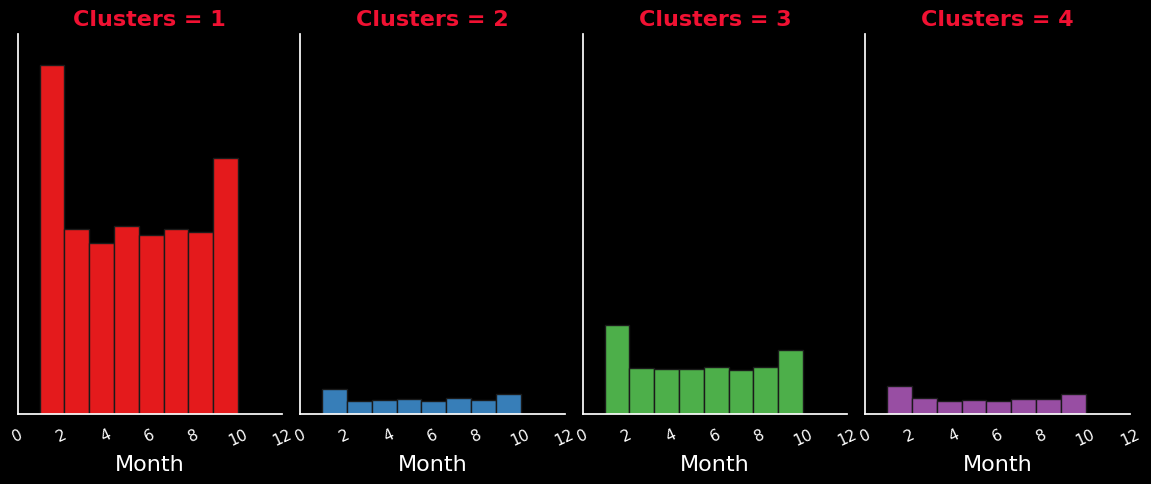

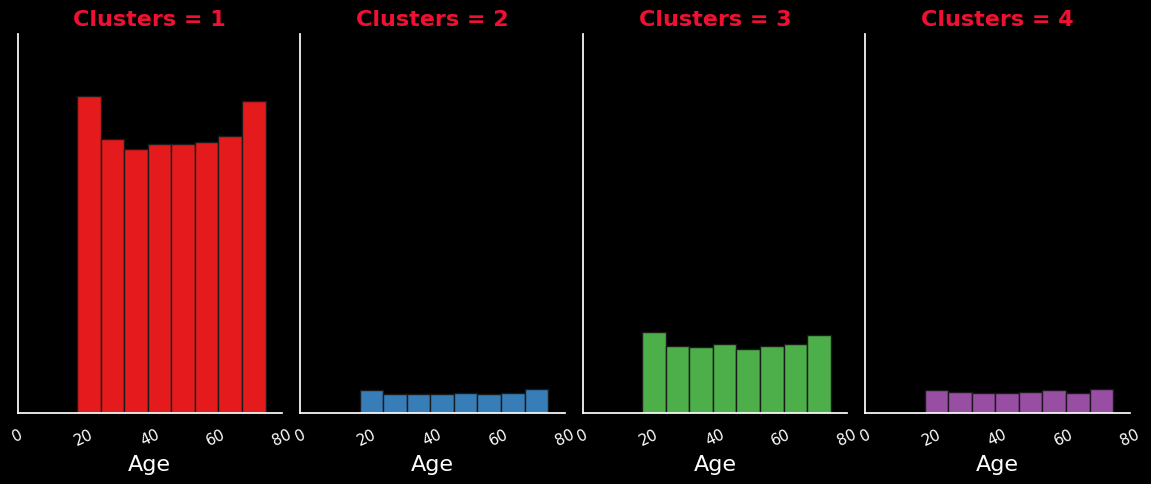

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns you want to include in the interpretation
selected_columns = ['Encoded_Gender', 'Transaction Amount', 'Encoded_Category', 'Month', 'Age', 'Clusters']

# Create a subset DataFrame with only the selected columns
selected_data = cust_data[selected_columns]

# Set styling parameters
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Dejavu sans'})

# Loop through the selected columns excluding 'Clusters'
for i in selected_columns[:-1]:
    # Create a FacetGrid for each column
    diag = sns.FacetGrid(selected_data, col="Clusters", hue="Clusters", palette="Set1")
    
    # Map histograms to each FacetGrid
    diag.map(plt.hist, i, bins=8, ec="k") 
    
    # Set styling for better visualization
    diag.set_xticklabels(rotation=25, color='white')
    diag.set_yticklabels(color='white')
    diag.set_xlabels(size=16, color='white')
    diag.set_titles(size=16, color='#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

# Show the plots
plt.show()


In [22]:
import pandas as pd

df = pd.DataFrame(cust_data)

# Export the DataFrame to a CSV file
df.to_csv('output_file.csv', index=False)


In [23]:
# Get the path where the file is stored
file_path = 'output_file.csv'

# Print the path
print(f"CSV file exported successfully. Stored at: {file_path}")

from IPython.display import FileLink

# Create a link to download the CSV file
FileLink(r'output_file.csv')

CSV file exported successfully. Stored at: output_file.csv


/kaggle/working/output_file.csv